In [3]:
# Mounting Drive
from  google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [29]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [42]:
# Loading Dataset

housing_data = pd.read_csv("/content/drive/MyDrive/Datasets/USA_Housing.csv")

print("Housing data : \n",housing_data.head())
print("Column Name : \n",housing_data.columns)

Housing data : 
    Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA

In [44]:
# Preprocessing Data

# Checking for Missing values
is_missing = housing_data.isnull().sum()
print("Missing values: \n",is_missing)


Missing values: 
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


<ipython-input-48-95a50ca2d3a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing_data.corr()


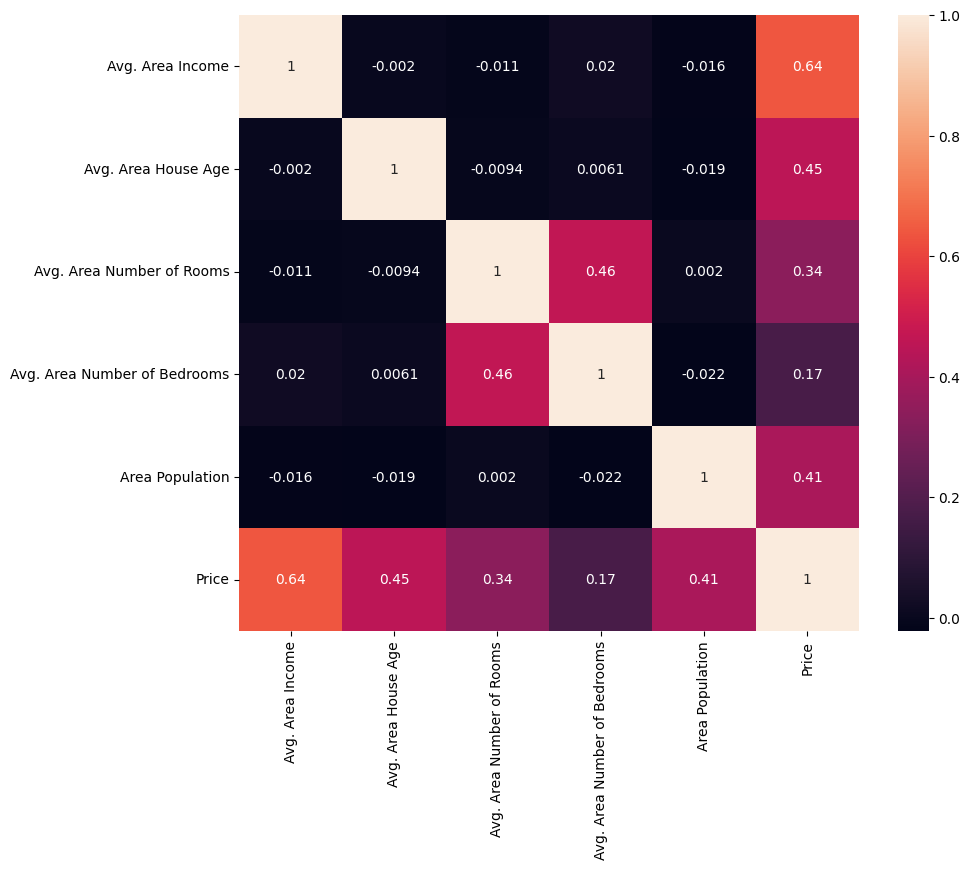

New columns list :  Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
After Droping : 
    Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06  
3                          3.26     34310.242831  1.260617e+06  
4                          4.23     26354

In [48]:
# Feature Selection
corr = housing_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

# Since address has no effect on price we remove the address column
_housing_data = housing_data.drop(columns=["Address"])
print("New columns list : ",_housing_data.columns)
print("After Droping : \n",_housing_data.head())


In [50]:
# Feature Scaling
scaler = StandardScaler()
x = scaler.fit_transform(_housing_data)

# Creating new dataset on scaled values
cleaned_housing_data  = _housing_data.copy()
cleaned_housing_data[_housing_data.columns] = x

print("Cleaned data columns : \n", cleaned_housing_data.columns)
print("Cleaned data : \n",cleaned_housing_data)
print("Data Description : \n",cleaned_housing_data.describe())

Cleaned data columns : 
 Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
Cleaned data : 
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             1.028660            -0.296927                   0.021274   
1             1.000808             0.025902                  -0.255506   
2            -0.684629            -0.112303                   1.516243   
3            -0.491499             1.221572                  -1.393077   
4            -0.807073            -0.944834                   0.846742   
...                ...                  ...                        ...   
4995         -0.752109             1.869297                  -0.845588   
4996          0.929740             1.030822                  -0.408686   
4997         -0.487235             1.284470                  -2.170269   
4998         -0.054592            -0.446694      